# Importação das Bibliotecas 
Realizando o processo de import para todas as bibliotecas necessárias para rodar o notebook 

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importando a database

Aqui, eu importei a database utilizando da biblioteca YFinance, que fornece algumas informações sobre a operação do bitcoin. Além disso, eu comecei a ver a base de dados que estava lidando, compreendendo sua formatação e como os dados estavam organizados.

In [30]:
# get historical market data
df_bitcoin = yf.download(tickers="BTC-USD", period="5y", interval="1d")

df_bitcoin.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-29,8246.037109,8261.707031,7990.497070,8104.185547,8104.185547,13034629109
2019-09-30,8104.226562,8314.231445,7830.758789,8293.868164,8293.868164,17115474183
2019-10-01,8299.720703,8497.692383,8232.679688,8343.276367,8343.276367,15305343413
2019-10-02,8344.212891,8393.041992,8227.695312,8393.041992,8393.041992,13125712443
2019-10-03,8390.774414,8414.227539,8146.437012,8259.992188,8259.992188,13668823409


In [31]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-09-29 to 2024-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1828 non-null   float64
 1   High       1828 non-null   float64
 2   Low        1828 non-null   float64
 3   Close      1828 non-null   float64
 4   Adj Close  1828 non-null   float64
 5   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 100.0 KB


Aqui, verifiquei se havia algum dado nulo, para não criar novas features e deixar linhas vazias.

In [32]:
colunas = df_bitcoin.columns
print("Contagem de nulls por coluna: \n")
for coluna in colunas:
    print(f'{coluna}:{df_bitcoin[coluna].isna().sum()}')

Contagem de nulls por coluna: 

Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:0


## Feature Engineering

Para conseguir criar um modelo mais eficiente, pensei em algumas features que poderiam ser úteis ao modelo. Assim, implementei features como a variação percentual e amplitude do dia.

In [33]:
for coluna in colunas:
    df_bitcoin[coluna] = df_bitcoin[coluna].apply(lambda x: round(x, 2))
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-29,8246.04,8261.71,7990.50,8104.19,8104.19,13034629109
2019-09-30,8104.23,8314.23,7830.76,8293.87,8293.87,17115474183
2019-10-01,8299.72,8497.69,8232.68,8343.28,8343.28,15305343413
2019-10-02,8344.21,8393.04,8227.70,8393.04,8393.04,13125712443
2019-10-03,8390.77,8414.23,8146.44,8259.99,8259.99,13668823409


In [34]:
df_bitcoin["Percentage_Variation"] = 100*(df_bitcoin["Close"] - df_bitcoin["Open"])/df_bitcoin["Open"] 
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,Percentage_Variation
Date,,,,,,,
2019-09-29,8246.04,8261.71,7990.50,8104.19,8104.19,13034629109,-1.720220
2019-09-30,8104.23,8314.23,7830.76,8293.87,8293.87,17115474183,2.340013
2019-10-01,8299.72,8497.69,8232.68,8343.28,8343.28,15305343413,0.524837
2019-10-02,8344.21,8393.04,8227.70,8393.04,8393.04,13125712443,0.585196
2019-10-03,8390.77,8414.23,8146.44,8259.99,8259.99,13668823409,-1.558617


In [35]:
df_bitcoin["Amplitude"] = df_bitcoin["High"] - df_bitcoin["Low"]
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,Percentage_Variation,Amplitude
Date,,,,,,,,
2019-09-29,8246.04,8261.71,7990.50,8104.19,8104.19,13034629109,-1.720220,271.21
2019-09-30,8104.23,8314.23,7830.76,8293.87,8293.87,17115474183,2.340013,483.47
2019-10-01,8299.72,8497.69,8232.68,8343.28,8343.28,15305343413,0.524837,265.01
2019-10-02,8344.21,8393.04,8227.70,8393.04,8393.04,13125712443,0.585196,165.34
2019-10-03,8390.77,8414.23,8146.44,8259.99,8259.99,13668823409,-1.558617,267.79


## Normalização dos dados

Para normalizar os dados, utilizei a técnica de Min-Max Scaling, que transforma os valores das colunas para um intervalo entre 0 e 1. Isso é útil para algoritmos de machine learning que são sensíveis à escala dos dados.


<Axes: title={'center': 'Close Price of Bitcoin in the last 5 years'}, xlabel='Date'>

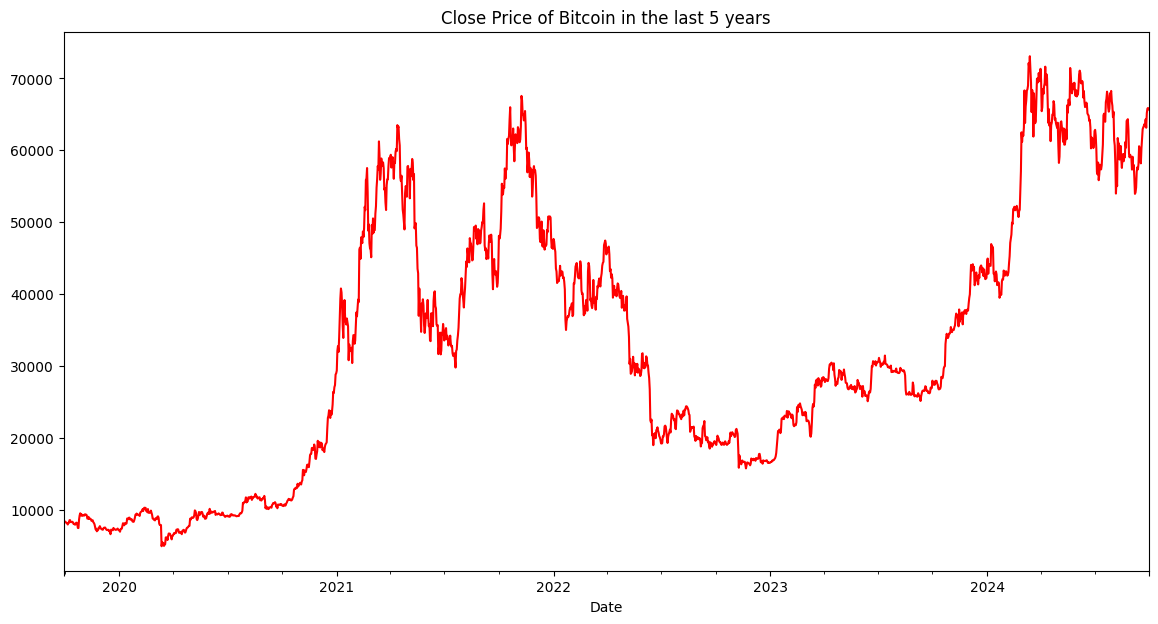

In [36]:
df_bitcoin["Close"].plot(figsize=(14, 7), title="Close Price of Bitcoin in the last 5 years", color="red")

## Escolha do Modelo

Apesar de ser interessante o uso de variáveis do dia anterior, como máxima, mínima, variação percentual e amplitude, a necessidade de ter previsões de mais de um dia levou ao uso de um modelo LSTM, contendo apenas a feature close. Isso se deve, pois seria necessário fazer uma aproximação de todas essas features visto que estariam no futuro.

In [37]:
from sklearn.preprocessing import MinMaxScaler

close_prices = df_bitcoin['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

In [38]:
def create_lstm_data(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

In [59]:
time_steps = 30
x, y = create_lstm_data(close_prices_scaled, time_steps)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [60]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/home/fvasconcellos/Desktop/Inteli/mod7/CryptoForecast/src/model/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
model.fit(x, y, epochs=50, batch_size=32)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.7917e-04
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.2648e-04
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 9.0226e-04
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 7.4856e-04
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.2201e-04
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.8318e-04
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.5745e-04
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.8013e-04
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.1750e-04
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.7022e-04
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 6.0950e-04
Epoch 15/50
57/57 ━━━━━━━━━

In [46]:
import datetime as dt
future_dates = pd.date_range(start=dt.datetime.today() - dt.timedelta(days=2), periods=30)
last_prices = close_prices[-time_steps:]
last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))
x_pred = np.array([last_prices_scaled[-time_steps:, 0]])
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))
predicted_prices_scaled = model.predict(x_pred)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [64]:
import datetime as dt
import numpy as np
import pandas as pd

# Generate future dates
future_dates = pd.date_range(start=dt.datetime.today() - dt.timedelta(days=30), periods=30)

# Get last time_steps of actual prices
last_prices = close_prices[-time_steps:]

# Scale the last prices
last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))

# Initialize the array to store predicted prices
predicted_prices = []

# Make iterative predictions for each future date
for i in range(len(future_dates)):
    x_pred = np.array([last_prices_scaled[-time_steps:, 0]])  # Use the last time_steps data
    x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))  # Reshape to LSTM input
    
    # Predict the next price
    predicted_price_scaled = model.predict(x_pred)
    
    # Inverse transform the scaled prediction back to the original scale
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    
    # Store the predicted price
    predicted_prices.append(predicted_price.flatten()[0])
    
    # Update the last_prices_scaled with the new predicted value
    next_input_scaled = np.zeros_like(last_prices_scaled[-1])
    next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
    last_prices_scaled = np.vstack([last_prices_scaled, next_input_scaled])

# Create the DataFrame with future dates and predicted prices
future_data = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices})
print(future_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
                         Date  Predicted Price
0  2024-08-30 20:16:48.932009     65674.867188
1  2024-08-31 20:16:48.932009     65630.296875
2  2024-09-01 20:16:48.932009     65605.523438
3  2024-09-02 20:16:48.932009     65596.179688
4  2024-09-03 20:16:48.932009     65600.015625
5  2024-09-04 20:16:48.932009     65612.906250
6  2024-09-05 20:16:48.932009     65631.132812
7  2024-09-06 20:16:48.932009     65651.890625
8  2024-09-07 20:16:48.932009     65673.406250
9  2024-09-08 20:16:48.932009     65694.671875
10 2024-09-09 20:16:48.932009     65715.304688
11 2024-09-10 20:16:48.932009     65735.304688
12 2024-09-11 20:16:48.932009     65754.875000
13 2024-09-12 20:16:48.932009     65774.171875
14 2024-09-13 20:16:48.932009     65793.296875
15 2024-09-14 20:16:48.932009     65812.312500
16 2024-09-15 20:16:48.932009     65831.320312
17 2024-09-16 20:16:48.932009     65850.281250
18 2024-09-17 20:16:48.932009     65869.078125
19 2024-09-18 20:16:48

/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value
/tmp/ipykernel_305337/437999296.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_input_scaled[0] = predicted_price_scaled[0]  # Replace only the predicted value


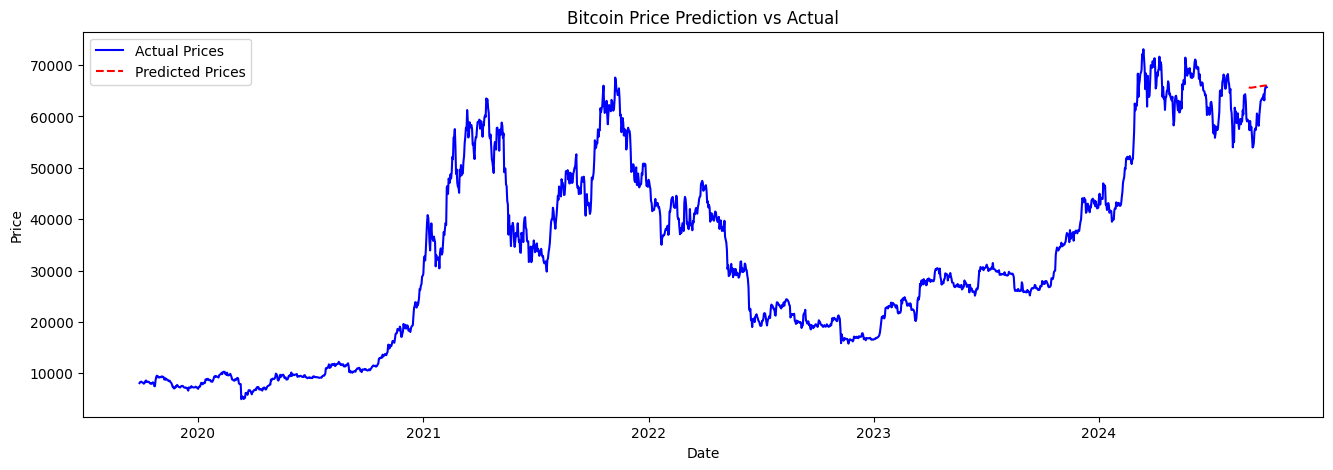

In [65]:
plt.figure(figsize=(16, 5), dpi=100)
plt.plot(df_bitcoin.index[-len(df_bitcoin["Close"]):], df_bitcoin["Close"], color='blue', label='Actual Prices')
plt.plot(future_data["Date"], predicted_prices, color='red', linestyle='dashed', label='Predicted Prices')

plt.title('Bitcoin Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Conclusão 

Apesar de um desempenho não tão satisfatório para curtos